In [3]:
import os

os.chdir(r"C:\Users\joshu\OneDrive\Desktop\Projects and Analysis 2\crime-housing-affordability")
print("CWD set to:", os.getcwd())


CWD set to: C:\Users\joshu\OneDrive\Desktop\Projects and Analysis 2\crime-housing-affordability


In [2]:
import os
os.getcwd()



'c:\\Users\\joshu\\OneDrive\\Desktop\\Projects and Analysis 2\\crime-housing-affordability\\notebooks'

In [4]:
df = pd.read_csv("data/processed/metro_affordability_baseline.csv")
df.shape


(546, 14)

In [5]:
df.head(3)


,RegionID,RegionName,StateName,home_value,rent,rent_burden,rent_leftover,rent_status,required_annual_income_rent,mortgage_total_monthly,mortgage_burden,mortgage_leftover,mortgage_status,required_annual_income_buy
0,102001,United States,NaN,361045,2203,0.264,819,Comfortable,86777,2337,0.280,686,Comfortable,88931
1,394913,"New York, NY",NY,721778,3499,0.420,-477,Not Viable,107697,4521,0.543,-1499,Not Viable,124193
2,753899,"Los Angeles, CA",CA,990630,4318,0.518,-1296,Not Viable,120915,6150,0.738,-3127,Not Viable,150474


In [6]:
df["rent_status"].value_counts()


rent_status
Comfortable    469
Stretched       52
Not Viable      25
Name: count, dtype: int64

In [7]:
df["mortgage_status"].value_counts()


mortgage_status
Comfortable    399
Stretched       85
Not Viable      62
Name: count, dtype: int64

In [8]:
df.loc[df["rent_status"] == "Not Viable",
       ["RegionName", "StateName", "rent", "rent_leftover", "required_annual_income_rent"]
      ].sort_values("required_annual_income_rent", ascending=False).head(10)


,RegionName,StateName,rent,rent_leftover,required_annual_income_rent
409,"Glenwood Springs, CO",CO,14732,-11709,288985
465,"Edwards, CO",CO,5049,-2026,132701
423,"Kapaa, HI",HI,5000,-1977,131917
535,"Breckenridge, CO",CO,4883,-1861,130034
121,"Santa Maria, CA",CA,4864,-1842,129722
35,"San Jose, CA",CA,4434,-1412,122786
398,"Key West, FL",FL,4381,-1359,121926
2,"Los Angeles, CA",CA,4318,-1296,120915
179,"Santa Cruz, CA",CA,4146,-1123,118130
527,"Jackson, WY",WY,4100,-1077,117391


In [9]:
df.loc[df["mortgage_status"] == "Not Viable",
       ["RegionName", "StateName", "home_value", "mortgage_total_monthly",
        "mortgage_leftover", "required_annual_income_buy"]
      ].sort_values("required_annual_income_buy", ascending=False).head(10)


,RegionName,StateName,home_value,mortgage_total_monthly,mortgage_leftover,required_annual_income_buy
35,"San Jose, CA",CA,1685026,10355,-7333,218353
527,"Jackson, WY",WY,1503963,9259,-6236,200653
465,"Edwards, CO",CO,1441675,8882,-5859,194565
535,"Breckenridge, CO",CO,1391955,8580,-5558,189704
12,"San Francisco, CA",CA,1174850,7266,-4243,168482
416,"Heber, UT",UT,1173644,7258,-4236,168364
179,"Santa Cruz, CA",CA,1141017,7061,-4038,165175
259,"Kahului, HI",HI,1087925,6739,-3717,159985
423,"Kapaa, HI",HI,1038986,6443,-3420,155201
54,"Urban Honolulu, HI",HI,1026986,6370,-3347,154028


In [10]:
rent_counts = df["rent_status"].value_counts().reset_index()
rent_counts.columns = ["rent_status", "count"]

rent_counts


,rent_status,count
0,Comfortable,469
1,Stretched,52
2,Not Viable,25


In [11]:
rent_counts.to_csv("outputs/rent_status_counts.csv", index=False)


In [12]:
mortgage_counts = df["mortgage_status"].value_counts().reset_index()
mortgage_counts.columns = ["mortgage_status", "count"]

mortgage_counts.to_csv("outputs/mortgage_status_counts.csv", index=False)


In [13]:
from tabulate import tabulate

print(tabulate(rent_counts, headers="keys", tablefmt="github"))


|    | rent_status   |   count |
|----|---------------|---------|
|  0 | Comfortable   |     469 |
|  1 | Stretched     |      52 |
|  2 | Not Viable    |      25 |


In [14]:
df["required_income_worst_case"] = df[
    ["required_annual_income_rent", "required_annual_income_buy"]
].max(axis=1)


In [15]:
worst_10 = (
    df.sort_values("required_income_worst_case", ascending=False)
      .loc[:, [
          "RegionName",
          "StateName",
          "required_annual_income_rent",
          "required_annual_income_buy",
          "required_income_worst_case"
      ]]
      .head(10)
)

worst_10


,RegionName,StateName,required_annual_income_rent,required_annual_income_buy,required_income_worst_case
409,"Glenwood Springs, CO",CO,288985,145160,288985
35,"San Jose, CA",CA,122786,218353,218353
527,"Jackson, WY",WY,117391,200653,200653
465,"Edwards, CO",CO,132701,194565,194565
535,"Breckenridge, CO",CO,130034,189704,189704
12,"San Francisco, CA",CA,115493,168482,168482
416,"Heber, UT",UT,112110,168364,168364
179,"Santa Cruz, CA",CA,118130,165175,165175
259,"Kahului, HI",HI,115041,159985,159985
423,"Kapaa, HI",HI,131917,155201,155201


In [16]:
worst_10["gap_from_100k"] = worst_10["required_income_worst_case"] - 100_000
worst_10


,RegionName,StateName,required_annual_income_rent,required_annual_income_buy,required_income_worst_case,gap_from_100k
409,"Glenwood Springs, CO",CO,288985,145160,288985,188985
35,"San Jose, CA",CA,122786,218353,218353,118353
527,"Jackson, WY",WY,117391,200653,200653,100653
465,"Edwards, CO",CO,132701,194565,194565,94565
535,"Breckenridge, CO",CO,130034,189704,189704,89704
12,"San Francisco, CA",CA,115493,168482,168482,68482
416,"Heber, UT",UT,112110,168364,168364,68364
179,"Santa Cruz, CA",CA,118130,165175,165175,65175
259,"Kahului, HI",HI,115041,159985,159985,59985
423,"Kapaa, HI",HI,131917,155201,155201,55201


In [17]:
df["required_annual_income_buy"].describe()


count       546.000000
mean      86857.120879
std       19523.617695
min       62732.000000
25%       74780.500000
50%       81787.500000
75%       92614.750000
max      218353.000000
Name: required_annual_income_buy, dtype: float64

In [18]:
df.loc[
    (df["required_income_worst_case"] > 100_000) &
    (df["required_income_worst_case"] <= 120_000)
].shape[0]


54

<Axes: title={'center': 'Required Income to Live Comfortably by Metro'}, ylabel='Frequency'>

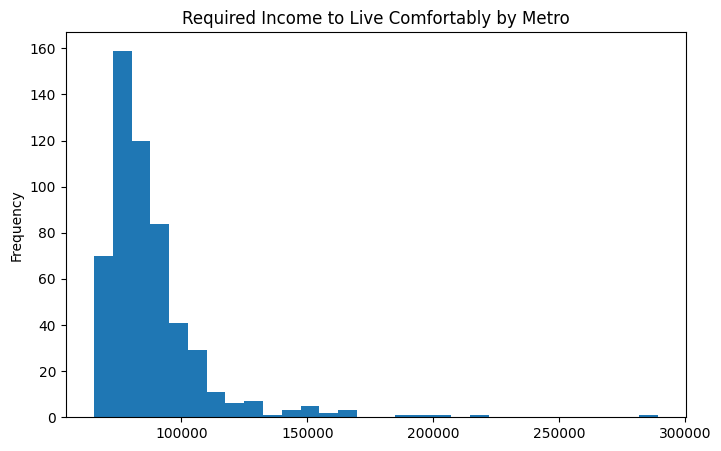

In [19]:
df["required_income_worst_case"].plot(
    kind="hist",
    bins=30,
    figsize=(8,5),
    title="Required Income to Live Comfortably by Metro"
)
